In [3]:

import pandas as pd
import numpy as np
# for Text Processing and Natural Language Processing (NLP)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# for Warnings
import warnings
warnings.filterwarnings('ignore')




In [28]:
df = pd.read_csv('dataset\Recipe Reviews and User Feedback Dataset.csv', index_col=0)
df.head()

,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [9]:
(df.info())       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18182 entries, 0 to 118
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recipe_number    18182 non-null  int64 
 1   recipe_code      18182 non-null  int64 
 2   recipe_name      18182 non-null  object
 3   comment_id       18182 non-null  object
 4   user_id          18182 non-null  object
 5   user_name        18182 non-null  object
 6   user_reputation  18182 non-null  int64 
 7   created_at       18182 non-null  int64 
 8   reply_count      18182 non-null  int64 
 9   thumbs_up        18182 non-null  int64 
 10  thumbs_down      18182 non-null  int64 
 11  stars            18182 non-null  int64 
 12  best_score       18182 non-null  int64 
 13  text             18180 non-null  object
dtypes: int64(9), object(5)
memory usage: 2.1+ MB


In [16]:
# checking duplicates
df.duplicated().value_counts()

False    18182
dtype: int64

In [17]:
# checking missing values
df.isna().sum()

recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               2
dtype: int64

#### our dataset has only `2` missing values on the `text` column 


In [19]:
## the missing values on the text column will be replaced by `No review`
df['text'].fillna("No review", inplace=True)
df.isnull().sum()


recipe_number      0
recipe_code        0
recipe_name        0
comment_id         0
user_id            0
user_name          0
user_reputation    0
created_at         0
reply_count        0
thumbs_up          0
thumbs_down        0
stars              0
best_score         0
text               0
dtype: int64

In [20]:
df.describe()

,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score
count,18182.000000,18182.000000,18182.000000,1.818200e+04,18182.000000,18182.000000,18182.000000,18182.000000,18182.000000
mean,38.689363,21773.667253,2.159608,1.623710e+09,0.014630,1.089264,0.549335,4.288802,153.162138
std,29.786647,23965.109637,10.014666,5.468697e+06,0.137974,4.201004,3.470124,1.544786,141.075316
min,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,100.000000,191775.000000,520.000000,1.665756e+09,3.000000,106.000000,126.000000,5.000000,946.000000


### Explanatory Data Analysis (EDA)

### Univariate Aalysis

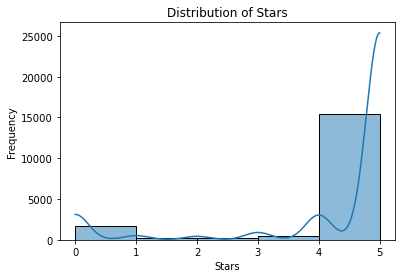

In [21]:
# Distribution of stars
sns.histplot(df['stars'], bins=5, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()


### User Reputation
- A box plot will illustrate the spread and any potential outliers in user reputation.

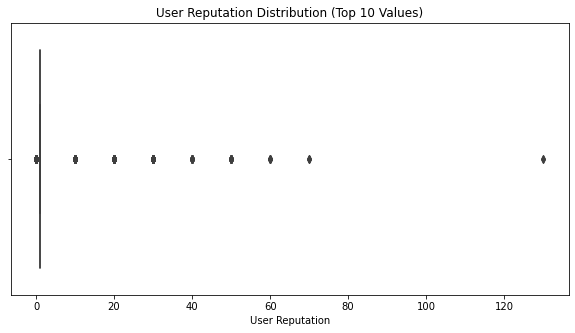

In [24]:
# Get the top 10 unique user reputation values
top_user_reputation = df['user_reputation'].unique()[:10]

# Create a box plot for user reputation limited to the top 10 values
plt.figure(figsize=(10, 5))
sns.boxplot(x=df[df['user_reputation'].isin(top_user_reputation)]['user_reputation'])
plt.title('User Reputation Distribution (Top 10 Values)')
plt.xlabel('User Reputation')
plt.show()


### Thumbs Up Count:

- A bar plot could show the frequency of different thumbs-up counts, providing insight into how often users like a recipe.

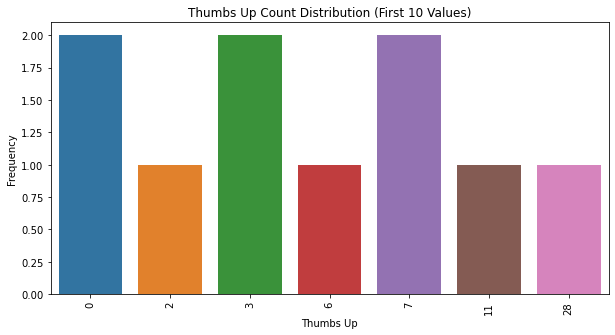

In [26]:
#  first 10 entries of 'thumbs_up'
first_10_thumbs_up = df['thumbs_up'].head(10)

plt.figure(figsize=(10, 5))
sns.countplot(x=first_10_thumbs_up)
plt.title('Thumbs Up Count Distribution (First 10 Values)')
plt.xlabel('Thumbs Up')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


- The thumbs-up count distribution graph shows user engagement with recipes in the dataset.
- Most recipes receive a low number of thumbs-up, peaking at 0, indicating limited positive feedback.
- Several recipes garner a higher number of thumbs-up, suggesting that some are particularly well-received.
- This distribution highlights areas for further exploration to understand the factors that make certain recipes more appealing to users.

## Reply Count Distribution


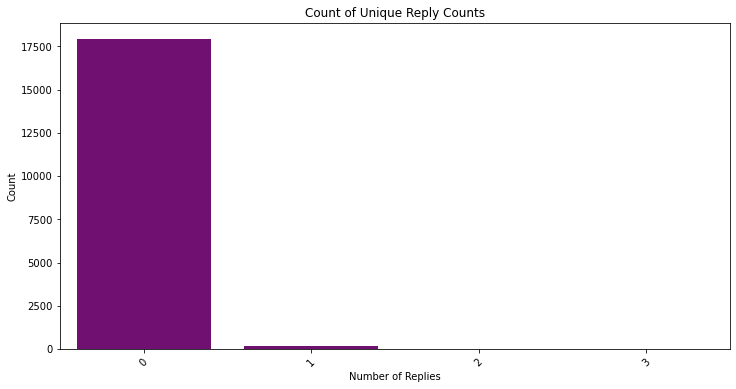

In [32]:
# Count of unique reply counts
reply_counts = df['reply_count'].value_counts().sort_index()

# Create a bar plot for the count of unique reply counts
plt.figure(figsize=(12, 6))
sns.barplot(x=reply_counts.index, y=reply_counts.values, color='purple')
plt.title('Count of Unique Reply Counts')
plt.xlabel('Number of Replies')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


